In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer


In [71]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())
print(df['label'].value_counts())

   label                                            message Unnamed: 2  \
0      0  Go until jurong point, crazy.. Available only ...        NaN   
1      0                      Ok lar... Joking wif u oni...        NaN   
2      1  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      0  U dun say so early hor... U c already then say...        NaN   
4      0  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
label
0    4825
1     747
Name: count, dtype: int64


First we need to preprocess the message meaning removing useless parts and noise from data by following ways
convert everything to lowercase
remove stupid words like is,the and,on,in
remove all the comma,full stop,colon and other similar stuff

count words like run,ran,running,runnnnn as a single word 


In [72]:
import re #removes punctuation marks
import nltk #for tokenization and last point of prev cell
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [73]:
nltk.download('stopwords')# stopwords:the and is etc

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [74]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def preprocess_message(mssg):
    mssg=mssg.lower()
    mssg = re.sub(r'[^\w\s]', '', mssg)     #syntax :  re.sub(pattern, replacement, string)
    mssg = ' '.join([stemmer.stem(word) for word in mssg.split() if word not in stop_words])
    return mssg

In [76]:
preprocessed_mssg=preprocess_message(df['message'].iloc[8])
print(preprocessed_mssg)
df['processed_message'] = df['message'].apply(preprocess_message)

winner valu network custom select receivea ï½900 prize reward claim call 09061701461 claim code kl341 valid 12 hour


In [90]:
vectorizer = TfidfVectorizer(max_features=5000)
X=vectorizer.fit_transform(df['processed_message']).toarray()
y=df['label']
print(X[1:5])


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)

(4457, 5000)


In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'), 
    Dropout(0.5),  

    Dense(32, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,177 (1.23 MB)

 Trainable params: 322,177 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
history = model.fit(
    X_train, y_train,
    epochs=10,  
    batch_size=32,  
    validation_data=(X_test, y_test)  
)

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8305 - loss: 0.5430 - val_accuracy: 0.8825 - val_loss: 0.2115
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9210 - loss: 0.1761 - val_accuracy: 0.9731 - val_loss: 0.0900
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9856 - loss: 0.0658 - val_accuracy: 0.9758 - val_loss: 0.0689
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9909 - loss: 0.0387 - val_accuracy: 0.9785 - val_loss: 0.0725
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9951 - loss: 0.0197 - val_accuracy: 0.9785 - val_loss: 0.0773
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9951 - loss: 0.0166 - val_accuracy: 0.9776 - val_loss: 0.0860
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9977 - loss: 0.0095 - val_accuracy: 0.9785 - val_loss: 0.0912
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9977 - loss: 0.0093 - val_accuracy: 0

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.0816 
Test Accuracy: 0.9794


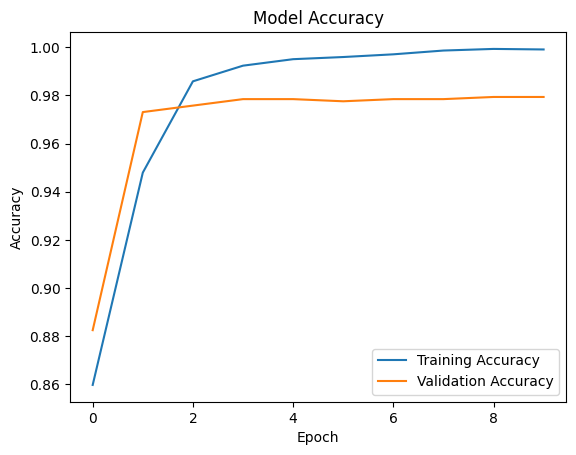

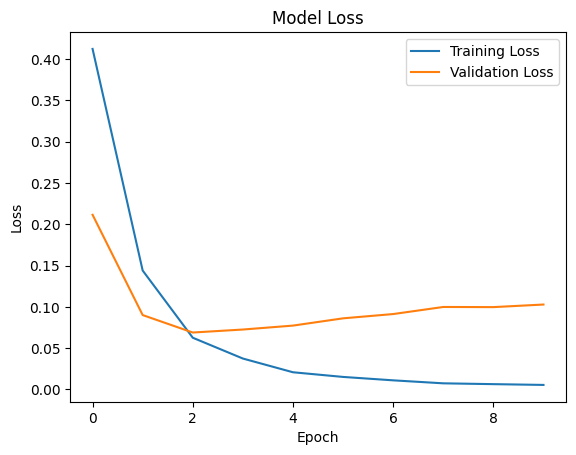

In [46]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [85]:
custom_message = "bro i bought your gift from the store in black friday sale"
prep_message = preprocess_message(custom_message)
custom_message_tfidf = vectorizer.transform([prep_message]).toarray()
print(f"Shape of custom message TF-IDF: {custom_message_tfidf.shape}")

prediction = model.predict(custom_message_tfidf)
predicted_class = "spam" if prediction[0] >= 0.5 else "not spam"
print(f"Custom Message: {custom_message}")
print(f"Predicted Class: {predicted_class} (Probability: {prediction[0][0]:.4f})")


Shape of custom message TF-IDF: (1, 5000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Custom Message: bro i bought your gift from the store in black friday sale
Predicted Class: not spam (Probability: 0.0310)


In [89]:
model.save('spam_classifier_model.keras')

In [92]:
import pickle

# Save the entire vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)